# Perceptron 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define Data Points

In [3]:
# Define the positive and negative

# Positive means True value is +1
# Negative means True value is -1
positive_points = np.array(([(-2,3),(0,1),(2,-1)]))
negative_points = np.array(([-2,1],(0,-1),(2,-3)))

In [4]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

In [5]:
negative_points

array([[-2,  1],
       [ 0, -1],
       [ 2, -3]])

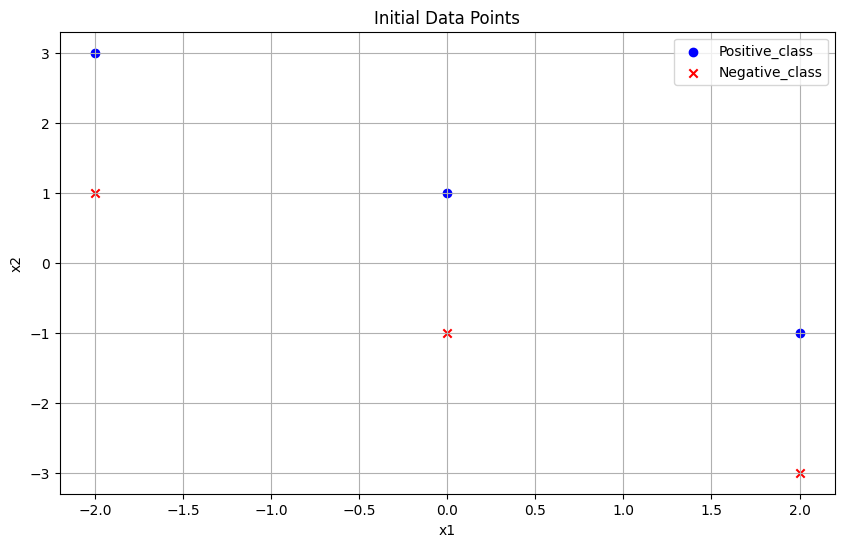

In [6]:
# Plot initial data points

plt.figure(figsize=(10,6))

# Plotting the points and there labels

plt.scatter(positive_points[:,0], positive_points[:,1], color='blue', marker='o', label='Positive_class')
plt.scatter(negative_points[:,0], negative_points[:,1], color='red', marker='x', label='Negative_class')

plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Initial Data Points")
plt.grid(True)
plt.show()

# Combine All Training Data

Array 1: [(1,1),(2,2),(3,3)]

Array 2: [(4,4),(5,5),(6,6)]

Here the (np.vstack) vertically concatenates means vertically stack them on top of each other.

np.vtack(Array 1, Array 2)

creater Array 3 : [(1,1),
                   (2,2),
                   (3,3),
                   (4,4),
                   (5,5),
                   (6,6)]

In [7]:
# Combine all points and labels

X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))


In [8]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [9]:
y

array([ 1,  1,  1, -1, -1, -1])

# Perceptron algorithm

In [10]:
# Defien perceptron algorithm
# Here X has all the data points.

def perceptron(X,y,steps = 10):
    theta = np.zeros(X.shape[1])
    theta0 = 0
    for t in range(steps):
        for i, xi in enumerate(X):
            # Here below line checks the hypothesis is making mistake or not.
            if y[i] * (np.dot(xi, theta) + theta0) <= 0:  
                theta += y[i] * xi
                theta0 += y[i]

        # plot after each iteration
        plot_decision_boundary(theta, theta0, t+1)
    return theta, theta0

# Above we just defined the function

In [11]:
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8,6))
    plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', label='Positive Class')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label="Negative Class")

    # Plot decision boundary
    x_values = np.linspace(-3,3,2)
    # Check for theta[1] to avoid division by zero in case of vertival line
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values, y_values, label=f'Iteration {iteration}')
    else:
        # Plot vertical line
        x_val = -theta0 / theta[0]
        plt.axvline(x=x_val, label=f'Iteration {iteration}')

    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"Decision Boundary at Iteration {iteration}")
    plt.legend()
    plt.grid(True)
    plt.show()

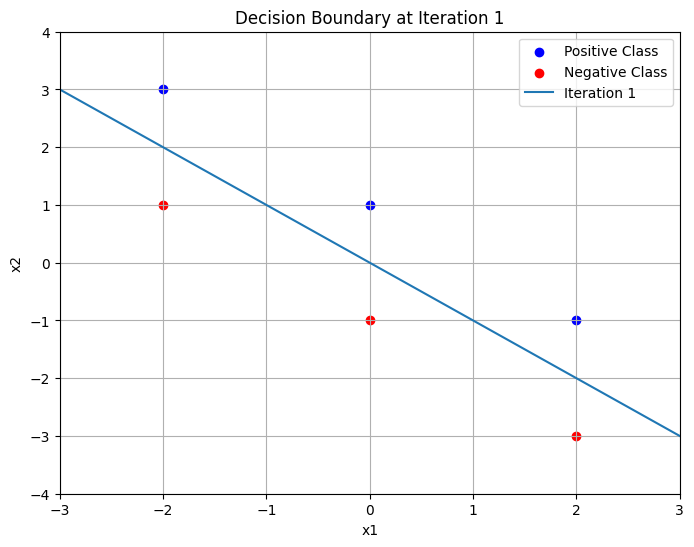

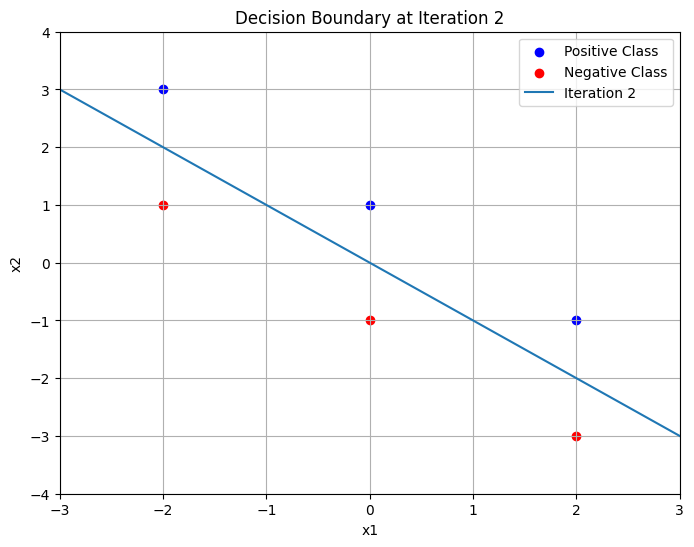

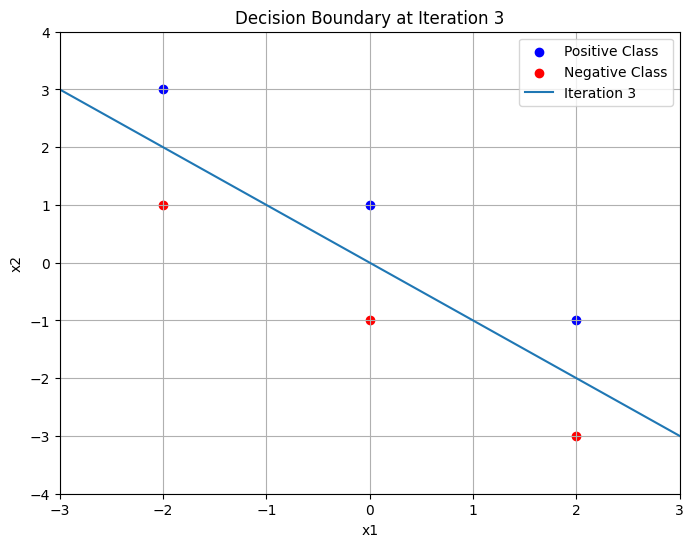

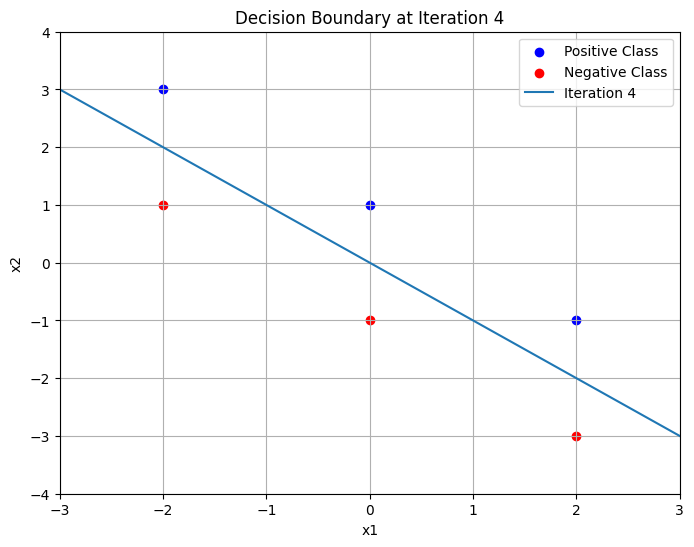

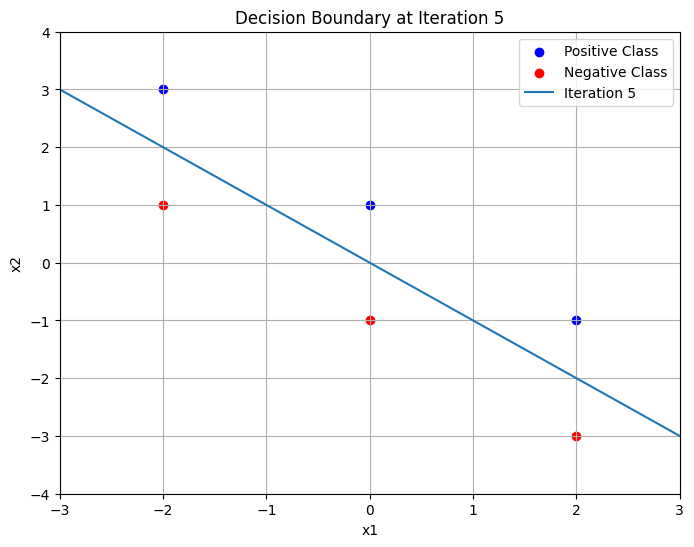

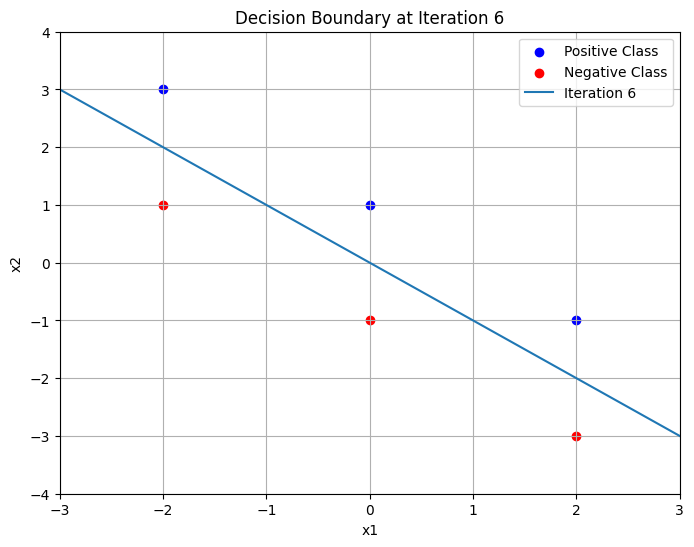

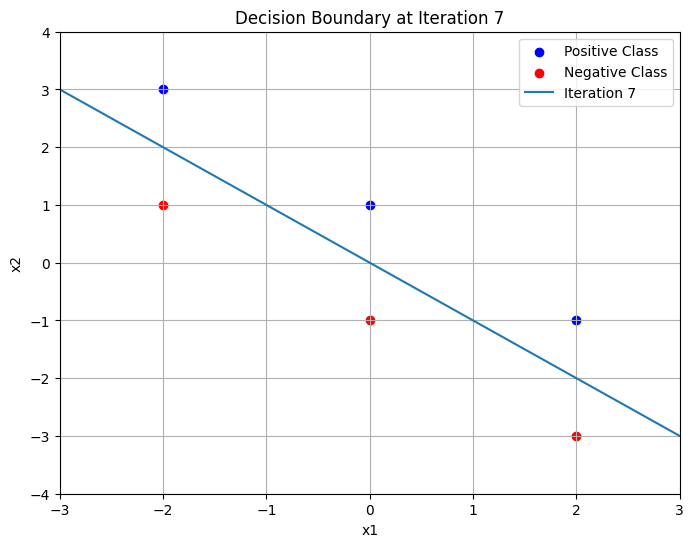

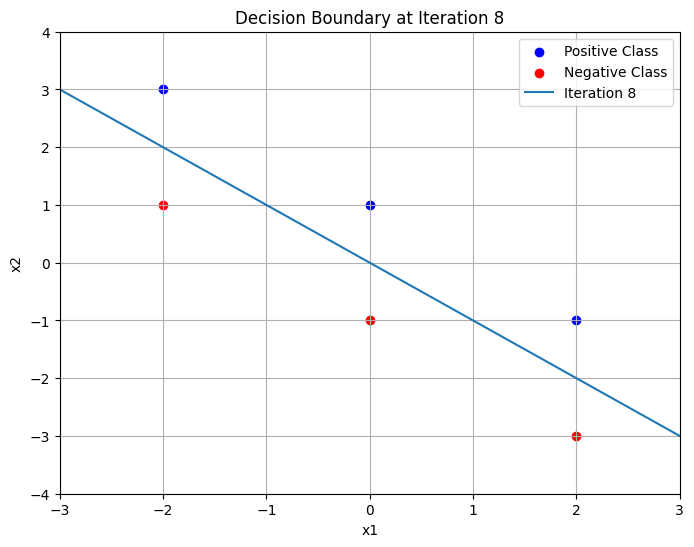

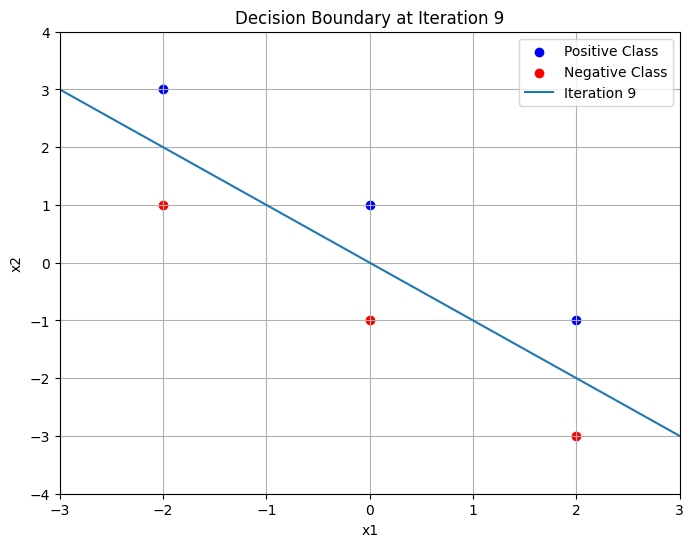

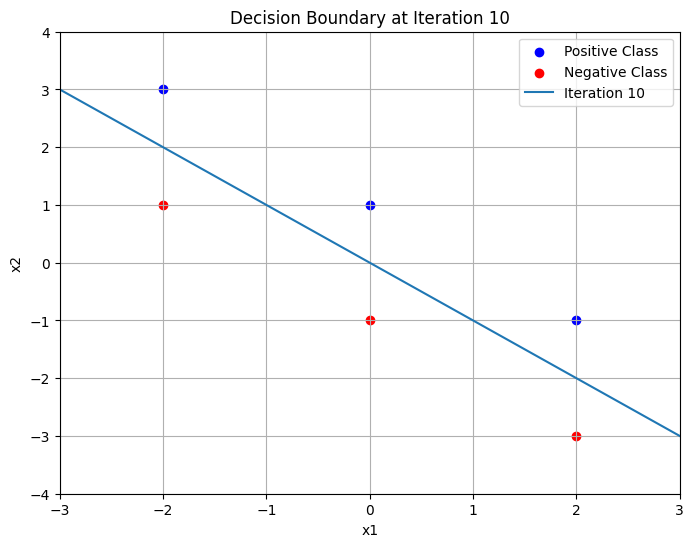

In [12]:
theta_final, theta0_final = perceptron(X, y, 10)